## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [2]:
#pd.options.display.max_rows = 1000

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('~/data/data_000637.txt')
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


2\. Find out the number of BX in a ORBIT (the value 'x').

In [5]:
df['BX_COUNTER'].min(), df['BX_COUNTER'].max()

(0, 3563)

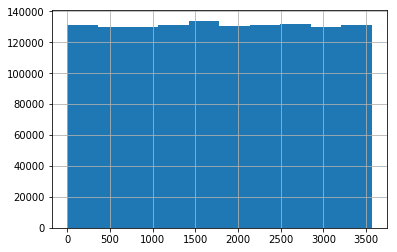

In [6]:
df['BX_COUNTER'].hist()

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [67]:
# strong hypothesis involved: number of rows written per unit time stays approximately constant
# throughtout the sampling process
n_rows=int(1310721/100)
total_rows=1310721
df3=pd.read_csv('~/data/data_000637.txt', nrows=n_rows)

n_frac_orbits=df3['ORBIT_CNT'].max()-df3['ORBIT_CNT'].min()
n_bx=df3['BX_COUNTER'].max()+1

estimated_time=n_frac_orbits*total_rows/n_rows*25*n_bx*1e-9

print('{time:.3f} sec estimated time on the first {percent:.1f}% rows'.format(time=estimated_time, percent=n_rows/total_rows*100))

1.167 sec estimated time on the first 1.0% rows


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [46]:
df['TIME']=(df['TDC_MEAS']*25/30+df['BX_COUNTER']*25+df['ORBIT_CNT']*(df['BX_COUNTER'].max()+1)*25)*1e-9
print('{time:.8f} sec of acquisition'.format(time=df['TIME'].max()-df['TIME'].min()))

0.98041625 sec of acquisition


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [8]:
df['HEAD']=np.random.randint(0,2, size=len(df))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1,0,123,3869200167,2374,26,344745.734939
1,0,0,124,3869200167,2374,27,344745.734939
2,0,0,63,3869200167,2553,28,344745.734944
3,0,0,64,3869200167,2558,19,344745.734944
4,1,0,64,3869200167,2760,25,344745.734949
5,0,0,63,3869200167,2762,4,344745.734949
6,0,0,61,3869200167,2772,14,344745.734949
7,0,0,139,3869200167,2776,0,344745.734949
8,0,0,62,3869200167,2774,21,344745.734949
9,1,0,60,3869200167,2788,7,344745.734949


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [9]:
df2=df[df['HEAD']==1]
df2

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1,0,123,3869200167,2374,26,344745.734939
4,1,0,64,3869200167,2760,25,344745.734949
9,1,0,60,3869200167,2788,7,344745.734949
10,1,1,7,3869200167,2785,4,344745.734949
12,1,1,6,3869200167,2792,18,344745.734950
13,1,0,36,3869200167,2791,23,344745.734949
15,1,1,139,3869200167,2797,0,344745.734950
20,1,1,10,3869200167,2789,14,344745.734949
21,1,0,57,3869200167,2789,10,344745.734949
22,1,0,61,3869200167,2790,23,344745.734949


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

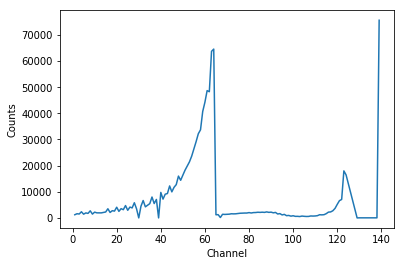

In [10]:
plt.plot(df[df['FPGA']==0]['TDC_CHANNEL'].value_counts().sort_index())
plt.ylabel('Counts')
plt.xlabel('Channel')
plt.show()

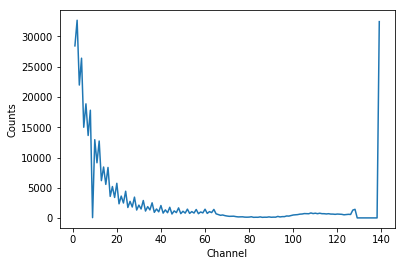

In [11]:
plt.plot(df[df['FPGA']==1]['TDC_CHANNEL'].value_counts().sort_index())
plt.ylabel('Counts')
plt.xlabel('Channel')
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [12]:
df.groupby(['TDC_CHANNEL']).size().sort_values(ascending=False)[:3]

TDC_CHANNEL
139    108059
64      66020
63      64642
dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [13]:
print('# of unique orb',len(df['ORBIT_CNT'].value_counts()))
print('# od unique orb w/ >1 TDC_CHANNEL=139', len(df[df['TDC_CHANNEL']==139]['ORBIT_CNT'].value_counts()))

# of unique orb 11001
# od unique orb w/ >1 TDC_CHANNEL=139 10976


In [14]:
# the number of counts of TDC_CHANNELS=139 for each orbit
df[df['TDC_CHANNEL']==139]['ORBIT_CNT'].value_counts()

3869209765    26
3869208086    26
3869209671    25
3869210426    25
3869207125    25
3869206506    25
3869207714    25
3869207812    25
3869208772    25
3869207118    25
3869209816    24
3869210247    24
3869207527    24
3869207461    24
3869206454    24
3869208343    24
3869209661    24
3869208925    24
3869208487    24
3869207130    24
3869208221    23
3869208841    23
3869208354    23
3869206508    23
3869206501    23
3869210945    23
3869208758    23
3869207659    23
3869206698    23
3869206625    23
              ..
3869200471     1
3869203633     1
3869200685     1
3869206362     1
3869204762     1
3869204478     1
3869202062     1
3869204799     1
3869204457     1
3869204428     1
3869203303     1
3869204860     1
3869202570     1
3869205813     1
3869203371     1
3869206396     1
3869206248     1
3869203329     1
3869203666     1
3869202919     1
3869205111     1
3869205573     1
3869206197     1
3869201336     1
3869206321     1
3869205161     1
3869205326     1
3869204217    

In [15]:
# checking if it is right
df[(df['TDC_CHANNEL']==139) & (df['ORBIT_CNT']==3869204503) ]

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
430339,1,0,139,3869204503,2800,0,344746.121287
